In [ ]:
%matplotlib inline


# machine learning for classification


In [1]:

import numpy as np
import pandas as pd

from ai4water import Model
from ai4water.utils.utils import get_version_info
from ai4water.datasets import MtropicsLaos



D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:

for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [3]:
dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos",
                      )



    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


In [4]:
data =    dataset.make_classification(lookback_steps=1)

print(data.shape)

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(258, 9)


In [5]:
data.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 16:36:00,22.540455,96.173793,2.2,34.8,144.6,0.0,0.90,2.868160e+15,1.0
2011-05-25 17:06:00,22.541138,96.174943,2.9,6.0,147.8,0.0,0.99,2.868160e+15,1.0
2011-05-25 17:24:00,22.541547,96.175632,2.6,6.0,149.1,0.0,1.33,2.868160e+15,1.0
2011-05-25 17:42:00,22.541957,96.176322,2.3,6.0,151.8,0.0,0.96,2.868160e+15,1.0
2011-05-25 18:06:00,22.542503,96.177241,1.9,5.8,149.3,0.0,0.74,2.868160e+15,1.0


In [6]:
model = Model(
    input_features=data.columns.tolist()[0:-1],
    output_features=data.columns.tolist()[-1:],
    model="XGBClassifier",
    split_random=True,
    x_transformation="zscore",
)


            building ML model for  
            classification problem using XGBClassifier


In [7]:
h = model.fit(data=data)

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
[11:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


***** Validation *****
input_x shape:  (36, 8)
target shape:  (36, 1)


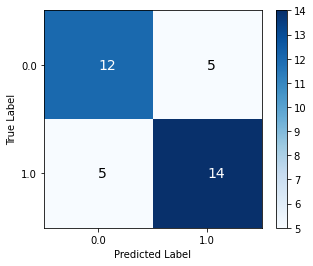

In [8]:
p = model.predict_on_validation_data(data=data)